# BRSM - PCA Assignment
### Hariharan Kalimuthu - 2020115015

In [47]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

### Task 1 - Loading the Dataset

In [48]:
wine_data = pd.read_excel("./wine.xlsx", sheet_name="in")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Principal Component Analysis

#### 1. Correlation Heatmap for all the features in the dataset.

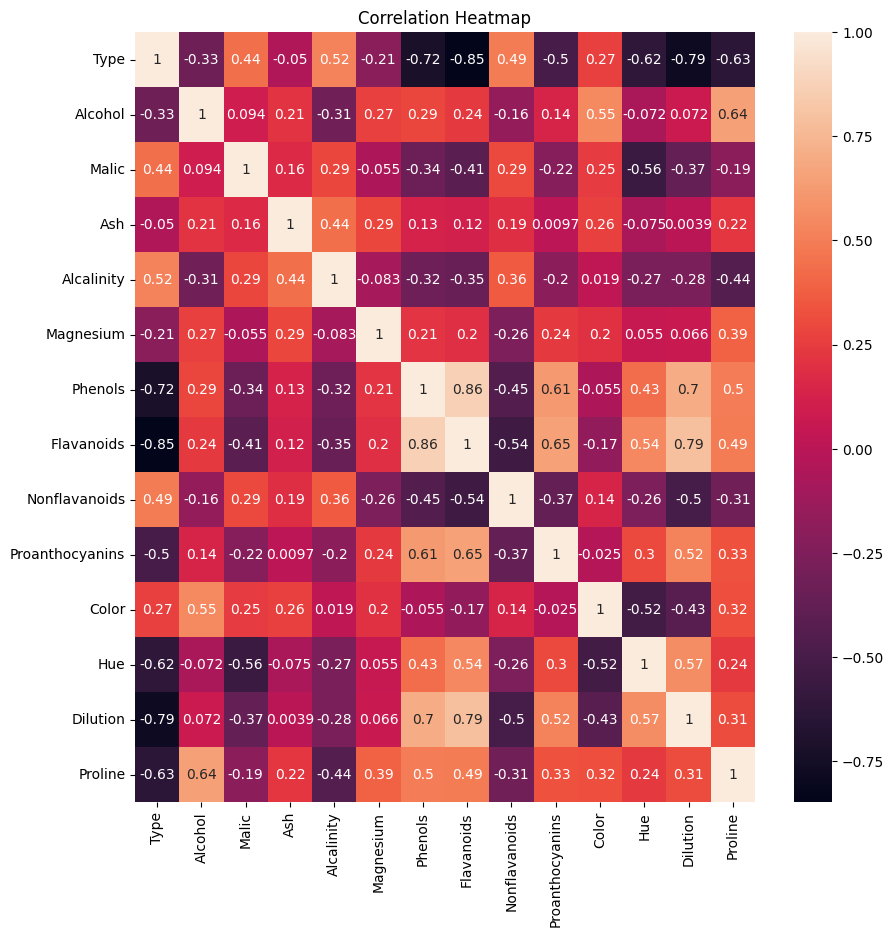

In [49]:
corr_matrix = wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Observations

- We see that there are some features that show positive correlations with each other and there are quite a few features that also show strong negative correaltions.

- Before performing PCA, this heatmap offers us an insight into how we might be able to reduce the dimensionality of the dataset by captuing the maximum variance.


#### Parallel Analysis on the dataset.

Number of components to retain based on parallel analysis: 3
Variance explained by the first 3 components: 0.677078464908595
Number of components to retain based on 90% variance: 7


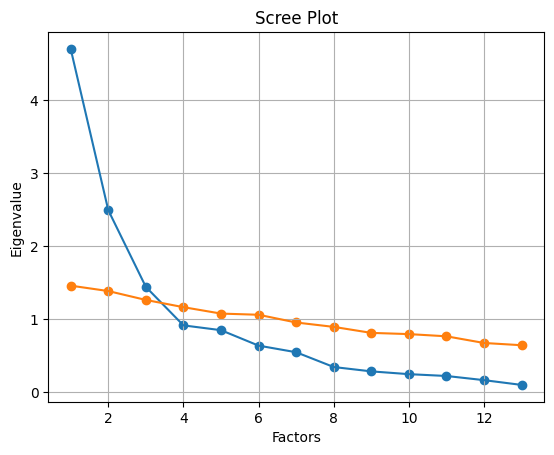

In [50]:
features = wine_data.drop(columns=['Type'])
fa = FactorAnalyzer(rotation=None, method='principal', is_corr_matrix=False)
fa.fit(features)
ev, v = fa.get_eigenvalues()

randomData = np.random.randn(features.shape[0], features.shape[1])
randomAnalysis = FactorAnalyzer(rotation=None, method='principal', is_corr_matrix=False)
randomAnalysis.fit(randomData)
ev_random, v_random = randomAnalysis.get_eigenvalues()

numComponents = sum(ev > ev_random)
print('Number of components to retain based on parallel analysis:', numComponents)
pca = PCA(n_components=3)
pca.fit(scaled_wine_data)
explained_variance = pca.explained_variance_ratio_
print("Variance explained by the first 3 components:", np.sum(explained_variance))


varianceExplained = ev/sum(ev)
cumulativeVarianceExplained = np.cumsum(varianceExplained)
numComponents = sum(cumulativeVarianceExplained <= 0.90) 
print('Number of components to retain based on 90% variance:', numComponents)


plt.scatter(range(1, features.shape[1]+1), ev) # Actual Data
plt.plot(range(1, features.shape[1]+1), ev)
plt.scatter(range(1, features.shape[1]+1), ev_random) # Random Data
plt.plot(range(1, features.shape[1]+1), ev_random)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Observations

- We observe that even if we just retain the first two components as suggested by parallel analysis, i.e. on using the first three principal components, we are able to capture 67.7%% of the variance in the dataset.

- As we reduce the number of principal components, the computations do become easier but we miss out on the variance in the dataset. In order to follow the standard practice of reucing dimensionality while capturing atleast 90% of the variance, we would have to use the first 7 principle components.

### Scatter Plot of the first two principal components

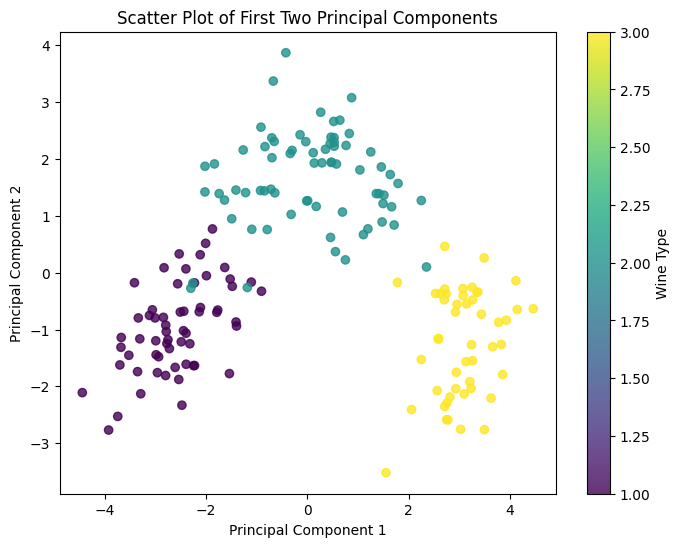

In [51]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_wine_data)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=wine_data['Type'], cmap='viridis', alpha=0.8)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Type')
plt.show()


### Observations
- The scatter plot displays the first two principal components (PC1 and PC2) of the wine dataset. We can clearly see that these two principle components do a very good job in separating the data items into three classes with very little overlap. 
- Hence, from the scatter plot, we can see how effective it is to just work with the first two principle components of the dataset.

### Chi-Square Test - Goodness of Fit

$$ H_0: \text{The observed distribution of wine types does not significantly differ from an equal distribution amongst the three types.} $$

$$ H_a: \text{The observed distribution of wine types significantly differs from an equal distribution amongst the three types.} $$



These hypotheses will guide in conducting the Chi-Square Goodness of Fit Test to determine whether the observed distribution of wine types differs significantly from the expected distribution.


### Chi-square Statistic and p-value.

In [52]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([59, 71, 48])
expected = np.array([np.sum(observed)/3] * 3)
chiStat, p_val = chisquare(observed, f_exp=expected)

print("Chi-Square Statistic:", chiStat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Since p-value is less than the threshold α, we can reject the null hypothesis.")
    print("Hence, The observed distribution of wine types significantly differs from an equal distribution.")
else:
    print("Since p-value is greater than or equal to the threshold α, we fail to reject the null hypothesis.")
    print("The observed distribution of wine types does not significantly differ from an equal distribution.")


Chi-Square Statistic: 4.4606741573033695
P-value: 0.10749219070565924
Since p-value is greater than or equal to the threshold α, we fail to reject the null hypothesis.
The observed distribution of wine types does not significantly differ from an equal distribution.



  
#### Test Summary
- **Chi-Square Statistic:** 4.46
- **P-value:** 0.107
- **Conclusion:** Fail to reject the null hypothesis.

#### Interpretation of Results

According to the Chi-Square Goodness of Fit Test, the observed distribution of wine types does not show a significant difference from an equal distribution among the three types at a 0.05 significance level. With a calculated p-value of 0.106, which exceeds the significance level, we do not reject the null hypothesis. This suggests there's inadequate evidence to claim that the observed distribution significantly strays from an equal representation of wine types. Thus, the data implies that the distribution of wine types in the dataset aligns with an expected scenario where each type of wine is equally represented.



### Chi-Square Test - Independence

In [53]:
wine_data['Alcohol_Category'] = pd.qcut(wine_data['Alcohol'], q=[0, 1/3, 2/3, 1], labels=['Low', 'Medium', 'High'])
wine_data[['Alcohol', 'Alcohol_Category']].head()

,Alcohol,Alcohol_Category
0,14.23,High
1,13.20,Medium
2,13.16,Medium
3,14.37,High
4,13.24,Medium


In [54]:
contingency_table = pd.crosstab(wine_data['Type'], wine_data['Alcohol_Category'])

print("Contingency Table (Cross-Tabulation) of Type and Alcohol Category:")
contingency_table


Contingency Table (Cross-Tabulation) of Type and Alcohol Category:


Alcohol_Category,Low,Medium,High
Type,,,
1,0,17,42
2,54,14,3
3,6,28,14


$$ H_0: \text{The type of wine is independent of the alcohol category.} $$

$$ H_a: \text{The type of wine is not independent of the alcohol category.} $$

In [55]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("\nSince p-value is less than the threshold α, we reject the null hypothesis.")
    print("There is an association between wine type and alcohol category.")
else:
    print("\nSince p-value is greater than or equal to the threshold α, we fail to reject the null hypothesis.")
    print("There is no association between wine type and alcohol category.")



Chi-Square Statistic: 121.35381180600793
Degrees of Freedom: 4
P-value: 2.744588037113176e-25

Since p-value is less than the threshold α, we reject the null hypothesis.
There is an association between wine type and alcohol category.


- There is sufficient evidence to reject the null hypothesis.
- The large chi-square statistic (~117) suggests a significant difference between the observed and expected frequencies, further supporting the rejection of the null hypothesis.
- With a very low p-value, we can confidently conclude that there is a significant association between the type of wine and the alcohol category.